7) Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed to check whether the student will get an admission or
not based on his/her GRE score and Academic Score. So to help the counselor to take
appropriate decisions, build a machine learning model classifier using a Decision tree to
predict whether a student will get admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [3]:
data = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

print(data.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [7]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.006942999999999998
R^2 Score: 0.5949664533283865


In [10]:
!pip install pydotplus

In [11]:
!pip install graphviz

In [12]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO

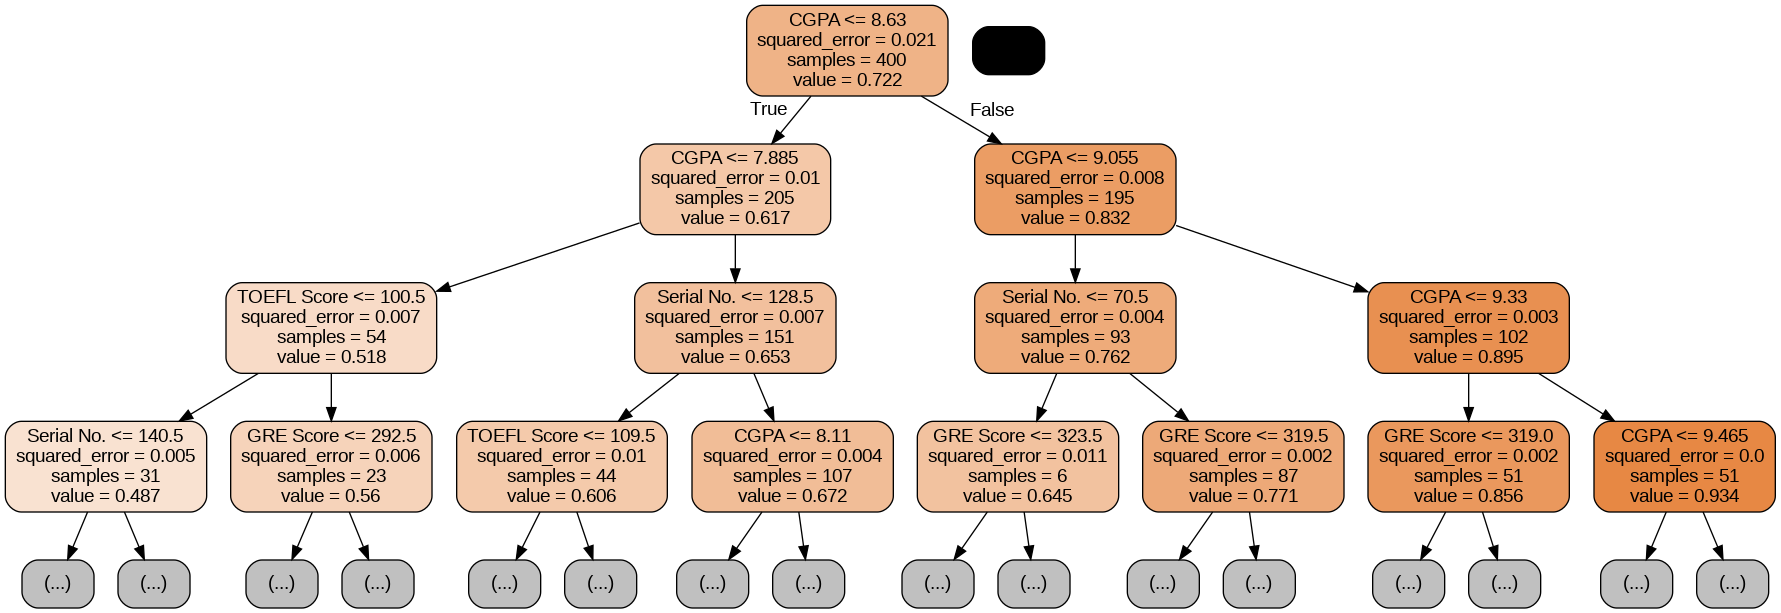

In [13]:
from IPython.display import Image
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('decision_tree.png')

Image(graph.create_png())

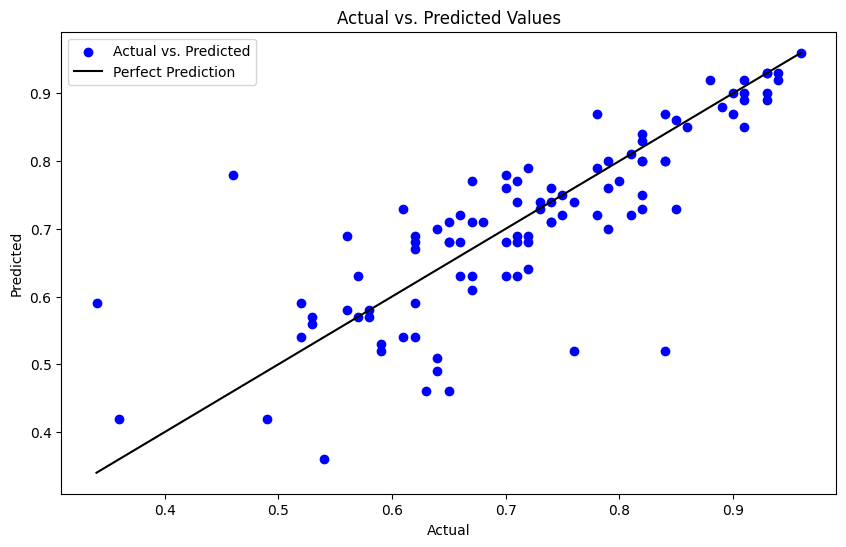

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()